<IPython.core.display.Javascript object>


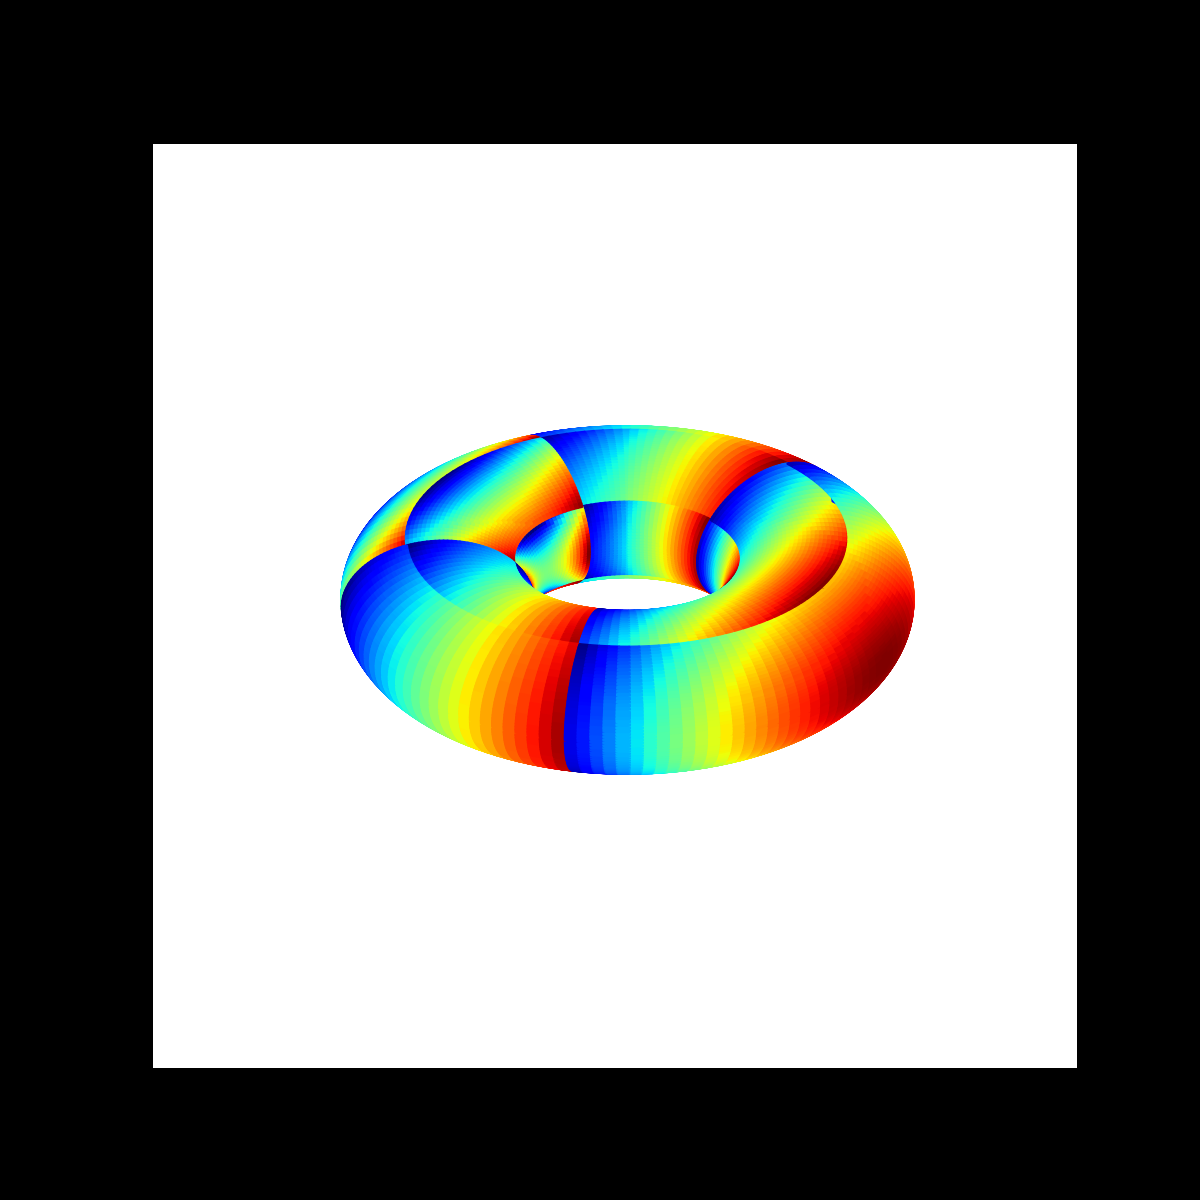

[[ 0.12        0.02        0.02        0.12        0.12      ]
 [ 0.09236068  0.02       -0.05236068  0.07527864 -0.09708204]
 [ 0.09236068 -0.05236068  0.06472136  0.12        0.03708204]
 [ 0.12        0.06472136 -0.05236068  0.09236068  0.03708204]
 [ 0.07527864 -0.05236068  0.02        0.09236068 -0.09708204]]


In [5]:
#make program interactive
%matplotlib notebook

#import libraries
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from random import randint

fig = plt.figure(facecolor="Black")
ax = plt.axes(projection="3d")
plt.axis("off")
plt.rcParams['figure.figsize'] = (6, 6)
segments = 25
anglesList = []
r, R = 1.0, 2.0
colours = ['Reds', 'Blues']

#function that accepts a matrix and returns wigner (array of values)
def Wigner(rho):
    """accepts density matrix and returns Wigner function
    over d x d toroidal lattice phase space"""

    #print(rho)
    d = np.shape(rho)[0]
    root_d = np.exp(1j * 2 * np.pi / d)

    # build generalized Pauli X & Z matrices
    # Pauli X
    X = np.zeros((d,d), dtype=complex)
    X[0,-1] = 1
    for i in range(d-1):
        X[i+1,i] = 1

    # Pauli Z
    Z = np.zeros((d,d), dtype=complex)
    for i in range(d):
        Z[i,i] = root_d**i

    # define Weyl displacement operators from Paulis
    def Weyl(vec):
        """accepts vector vec = [a,b] and returns 
        Weyl displacement operator T_[a,b]"""

        #  extract displacement vector and enforce periodic boundary
        # (i.e. stay on the toroidal lattice)
        v1, v2 = vec
        v1 = np.mod(v1, d)
        v2 = np.mod(v2, d)

        T = root_d**(- v1 * v2 / 2) * ( np.linalg.matrix_power(Z, v1) @ np.linalg.matrix_power(X, v2) )

        return T

    # build un-displaced parity operator
    T0 = np.zeros((d,d), dtype=complex)
    for v1 in range(d):
        for v2 in range(d):
            T0 += 1/d * Weyl([v1,v2])

    # evaluate Wigner function (note the double use of v1 and v2
    # as both vectors and array indices)
    wigner = np.zeros((d,d))
    for v1 in range(d):
            for v2 in range(d):
                value = 1/d * np.trace( rho @ Weyl([v1,v2]) @ T0 @ Weyl([v1,v2]).conj().T )
                # print(value)
                if np.abs(value.imag) < 1e-1: value = value.real
                else: raise Exception("imaginary value in Wigner function")
                wigner[v1,v2] = value

    return wigner

def main():
    dim = 5
    state = np.zeros(dim, dtype=complex)
    state[0] = 1/np.sqrt(2)
    state[-2] = 1/np.sqrt(2)
    rho = np.outer(state, np.conjugate(state))
    wigner = Wigner(rho)
    
    
    maxval = abs(wigner).max()
    #im = plt.imshow(wigner, cmap=matplotlib.cm.RdBu_r, vmax=maxval, vmin=-maxval, origin='lower')
    #plt.colorbar(im)
    #plt.show()
    print(wigner)
    
    for i in range (0, dim):
        lowerAngle = i*(2*np.pi/dim)
        upperAngle = (i+1)*(2*np.pi/dim)
        anglesList.append(np.linspace(lowerAngle, upperAngle, segments))

    ax.set_zlim3d(-3, 3)
    ax.set_ylim3d(-3, 3)
    ax.set_xlim3d(-3, 3)
    
    for j in range (0, dim):
        for k in range (0, dim):
            if wigner[k][j] > 0:
                redOrBlue = 0
            else:
                redOrBlue = 1
            theta, phi = np.meshgrid(anglesList[j], anglesList[k])
            
            X = (R + r*np.cos(phi))*np.cos(theta)
            Y = (R + r*np.cos(phi))*np.sin(theta)
            Z = r*np.sin(phi)
                
            color_dimension = X # change to desired fourth dimension
            minn, maxx = color_dimension.min(), color_dimension.max()
            norm = matplotlib.colors.Normalize(minn, maxx)
            m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
            m.set_array([])
            fcolors = m.to_rgba(color_dimension)
            
            ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors = fcolors, vmin=minn, vmax=maxx, shade=False)
            
    plt.show()

if __name__ == "__main__":
    main()